In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/AIMLproject/Lung_Cancer.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Readin first 5 rows
print(df.head())

   id  age  gender      country diagnosis_date cancer_stage family_history  \
0   1   64    Male       Sweden       4/5/2016      Stage I            Yes   
1   2   50  Female  Netherlands      4/20/2023    Stage III            Yes   
2   3   65  Female      Hungary       4/5/2023    Stage III            Yes   
3   4   51  Female      Belgium       2/5/2016      Stage I             No   
4   5   37    Male   Luxembourg     11/29/2023      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treatment_type end_treatment_date  survi

In [ ]:
# Reading last 5 rows
print(df.tail())

            id  age  gender   country diagnosis_date cancer_stage  \
889995  889996   40    Male     Malta       7/1/2022     Stage IV   
889996  889997   62  Female    Cyprus      9/27/2015     Stage II   
889997  889998   48  Female   Estonia      3/27/2016    Stage III   
889998  889999   67  Female  Slovakia     12/22/2015     Stage IV   
889999  890000   55  Female     Malta      7/26/2021     Stage II   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
889995             No  Passive Smoker  44.8                243             1   
889996            Yes   Former Smoker  21.6                240             0   
889997            Yes    Never Smoked  38.6                242             1   
889998            Yes   Former Smoker  18.6                194             1   
889999            Yes  Current Smoker  42.8                250             0   

        asthma  cirrhosis  other_cancer treatment_type end_treatment_date  \
889995       1          1  

In [ ]:
# checking if theres is duplicates ( the total sum of duplicates)
print(df.duplicated().sum())

0


In [ ]:
# Checking the data types of each column
print(df.dtypes)

id                      int64
age                     int64
gender                 object
country                object
diagnosis_date         object
cancer_stage           object
family_history         object
smoking_status         object
bmi                   float64
cholesterol_level       int64
hypertension            int64
asthma                  int64
cirrhosis               int64
other_cancer            int64
treatment_type         object
end_treatment_date     object
survived                int64
dtype: object


In [ ]:
# Reading the column heads
print(df.columns)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')


Now to do the scaling, there are 2 types. Min max scaling and standadization. We only aply this to numeric values.

The columns that need to perform scaling are, 'age', 'bmi' and 'cholesterol_level'. The other columns('hypertension','asthma', 'cirrhosis', 'other_cancer','survived') are alredy in binary format. so no need of scaling

In [ ]:
# Define scalers
scaler_standard = StandardScaler()   # for age and bmi
scaler_minmax = MinMaxScaler()       # for cholesterol_level

# Makes a copy of the original dataset so original data remains unchanged. All transformations are done in df_scaled
df_scaled = df.copy()

# Standardize age and bmi
# fit_transform() first calculates the mean & standard deviation (fit), then applies the transformation (transform).
df_scaled[['age', 'bmi']] = scaler_standard.fit_transform(df[['age', 'bmi']])

# Normalize cholesterol_level
# fit_transform() finds the minimum and maximum values of cholesterol, then rescales all values between 0 and 1.
df_scaled[['cholesterol_level']] = scaler_minmax.fit_transform(df[['cholesterol_level']])

# Printing the scaled dataset (first 5 rows)
print("----- Scaled Dataset -----")
print(df_scaled.head())

----- Scaled Dataset -----
   id       age  gender      country diagnosis_date cancer_stage  \
0   1  0.899796    Male       Sweden       4/5/2016      Stage I   
1   2 -0.500977  Female  Netherlands      4/20/2023    Stage III   
2   3  0.999851  Female      Hungary       4/5/2023    Stage III   
3   4 -0.400922  Female      Belgium       2/5/2016      Stage I   
4   5 -1.801696    Male   Luxembourg     11/29/2023      Stage I   

  family_history  smoking_status       bmi  cholesterol_level  hypertension  \
0            Yes  Passive Smoker -0.130748           0.326667             0   
1            Yes  Passive Smoker  1.279296           0.866667             1   
2            Yes   Former Smoker  1.613882           0.786667             1   
3             No  Passive Smoker  1.494387           0.606667             1   
4             No  Passive Smoker -1.289852           0.186667             0   

   asthma  cirrhosis  other_cancer treatment_type end_treatment_date  survived  
0       

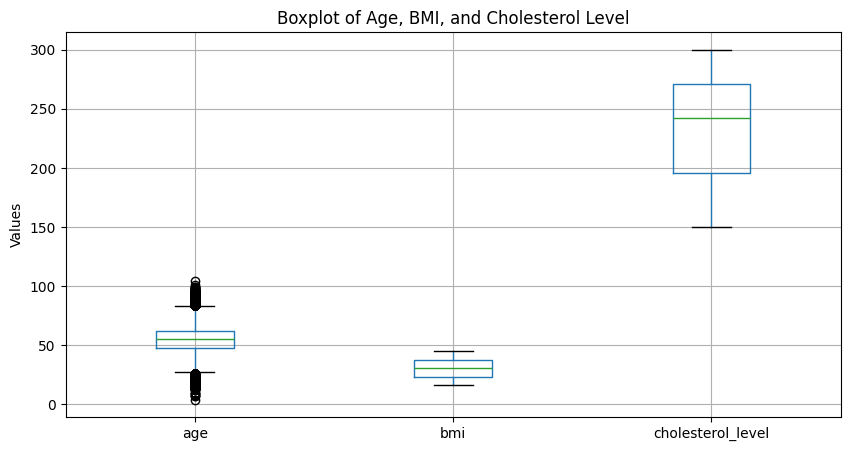

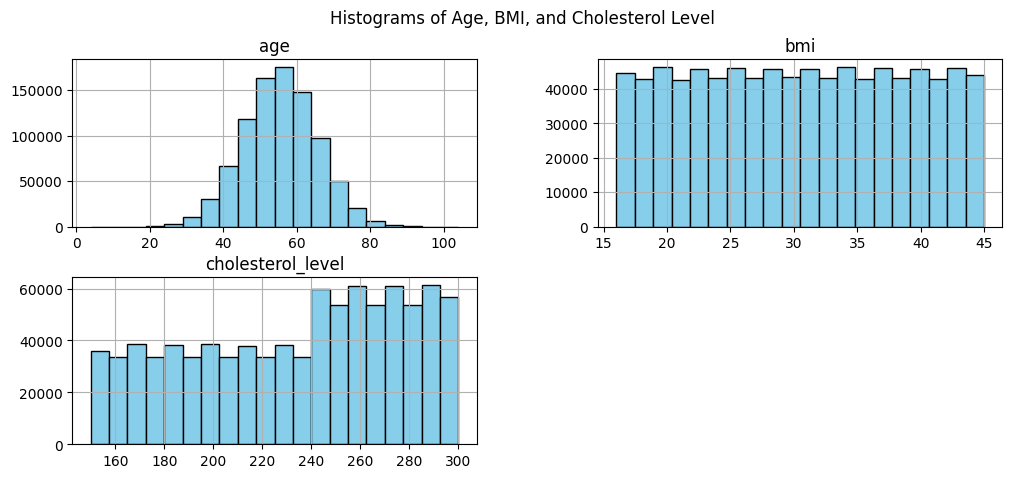

In [ ]:
# Numeric columns to check
cols_to_check = ["age", "bmi", "cholesterol_level"]

# 1. Boxplot
plt.figure(figsize=(10, 5))       # Sets figure size
df[cols_to_check].boxplot()       # Creates box plot and it shows median (middle line), quartiles (box edges), and outliers (dots outside whiskers).
plt.title("Boxplot of Age, BMI, and Cholesterol Level")
plt.ylabel("Values")
plt.show()

# 2. Histogram
df[cols_to_check].hist(bins=20,figsize=(12, 5), color="skyblue", edgecolor="black")   #bins=20 , Divides data into 20 intervals
plt.suptitle("Histograms of Age, BMI, and Cholesterol Level")
plt.show()